# polynomial regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [ ]:
df=pd.read_csv("Model1.csv",date_parser=True)
df.head()

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million
0,2020-03-11,62,6,4.857,1,1,0.143,0.045,0.004,0.004,0.001,0.001,0.0
1,2020-03-12,73,11,6.143,1,0,0.143,0.053,0.008,0.004,0.001,0.000,0.0
2,2020-03-13,82,9,7.286,2,1,0.286,0.059,0.007,0.005,0.001,0.001,0.0
3,2020-03-14,102,20,9.714,2,0,0.286,0.074,0.014,0.007,0.001,0.000,0.0
4,2020-03-15,113,11,10.571,2,0,0.286,0.082,0.008,0.008,0.001,0.000,0.0


In [ ]:
df_train=df.drop(['total_deaths_per_million','total_deaths','new_deaths','new_cases_smoothed','new_deaths_smoothed','new_cases_smoothed_per_million','new_deaths_smoothed_per_million','total_cases_per_million','new_cases_per_million','new_deaths_per_million'],axis=1)

In [ ]:
df_train=df_train[df_train['date']>'2021-02-30'].copy()
df_train.head()

,date,total_cases,new_cases
355,2021-03-01,11124527,12286
356,2021-03-02,11139516,14989
357,2021-03-03,11156923,17407
358,2021-03-04,11173761,16838
359,2021-03-05,11192045,18284


In [ ]:
df_train['date']=pd.to_datetime(df_train['date'])

In [ ]:
df_train['date']=df_train['date'].map(dt.datetime.toordinal)

In [ ]:
df_train.head()

,date,total_cases,new_cases
355,737850,11124527,12286
356,737851,11139516,14989
357,737852,11156923,17407
358,737853,11173761,16838
359,737854,11192045,18284


In [182]:
df_train.tail()

,date,total_cases,new_cases
432,737927,25228996,263533
433,737928,25496330,267334
434,737929,25772440,276110
435,737930,26031991,259551
436,737931,26289290,257299


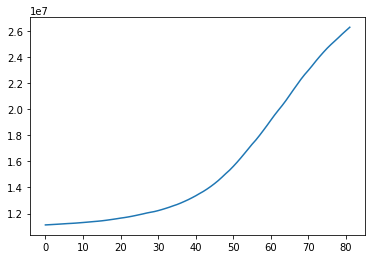

In [170]:
x=np.array(df_train['date'])
y=np.array(df_train['total_cases'])
plt.plot(y)
plt.show()


In [171]:
x_train=np.reshape(x,(-1, 1))
y_train=np.reshape(y,(-1, 1))


In [172]:
poly=PolynomialFeatures(degree=2)
x_train=poly.fit_transform(x_train)

In [173]:
model=linear_model.LinearRegression()
model.fit(x_train,y_train)
accuracy=model.score(x_train,y_train)
acc=round(accuracy*100,3)
print(acc)

99.51


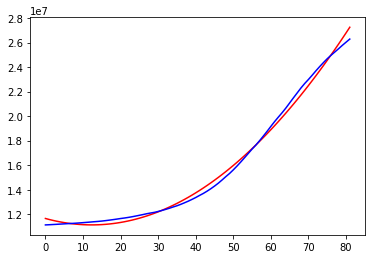

In [174]:
y1=model.predict(x_train)
plt.plot(y1,color='red',label='Predicted values')
plt.plot(y_train,color='blue',label='Actual values')
plt.show()



In [189]:
days = 2
print('-'*30);print('PREDICTION');print('-'*30)
print(f'Prediction - Total cases count after {days} days:',end='')
print(round(int(model.predict(poly.fit_transform([[737928+days]]))/1000000),2),'Million')

------------------------------
PREDICTION
------------------------------
Prediction - Total cases count after 2 days:26 Million
